# Clicked Ads Classification by Machine Learning 

### Import Data and Iniziation 

In [ ]:
!pip install -U ppscore

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for ppscore: filename=ppscore-1.3.0-py2.py3-none-any.whl size=13165 sha256=26d5d2f162f1146bddb766450aaeda768c16c4ce7282fdcdd4ce65c9e9ae0b3e
  Stored in directory: /root/.cache/pip/wheels/d8/2d/fc/c1699298a1241684a460b125835f7871ee8e3ab3afea9b5d6f
Successfully built ppscore


In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from datetime import datetime as dt 
import ppscore as pps

from warnings import filterwarnings
filterwarnings('ignore')

df = pd.read_csv(r'/content/drive/MyDrive/Gcollab /Mini Project _ Batch 13 JAP /Clicked Ads Dataset.csv', delimiter=',')


In [ ]:
# To Display Output without max columns 

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
# developer-friendly columns name 
df.columns = [x.lower().replace(' ', '_').replace('-', '_') for x in df.columns.to_list()]

df.sample(5)

,unnamed:_0,daily_time_spent_on_site,age,area_income,daily_internet_usage,male,timestamp,clicked_on_ad,city,province,category
159,159,75.55,36,512644090.0,159.24,Perempuan,5/9/2016 2:58,Yes,Bandung,Jawa Barat,Food
817,817,54.47,23,327460630.0,141.52,NaN,3/26/2016 19:37,Yes,Medan,Sumatra Utara,Otomotif
228,228,70.68,31,521010560.0,199.08,Perempuan,7/17/2016 1:58,No,Denpasar,Bali,Food
496,496,81.10,29,428204490.0,216.49,Laki-Laki,7/8/2016 3:47,No,Bekasi,Jawa Barat,Furniture
380,380,80.22,30,432644170.0,224.58,Perempuan,7/5/2016 15:14,No,Bandar Lampung,Lampung,House


In [ ]:
# Delete Columns unnamed:_0 
df.drop(['unnamed:_0'], axis =1, inplace = True)

## Exploratory Data Analysis 


### Descriptive Analysis 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   daily_time_spent_on_site  987 non-null    float64
 1   age                       1000 non-null   int64  
 2   area_income               987 non-null    float64
 3   daily_internet_usage      989 non-null    float64
 4   male                      997 non-null    object 
 5   timestamp                 1000 non-null   object 
 6   clicked_on_ad             1000 non-null   object 
 7   city                      1000 non-null   object 
 8   province                  1000 non-null   object 
 9   category                  1000 non-null   object 
dtypes: float64(3), int64(1), object(6)
memory usage: 78.2+ KB


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isna().sum()

daily_time_spent_on_site    13
age                          0
area_income                 13
daily_internet_usage        11
male                         3
timestamp                    0
clicked_on_ad                0
city                         0
province                     0
category                     0
dtype: int64

In [ ]:
# Check Value for each Columns -- Check Invalid Data 

for x in df.columns.to_list() : 
  print(x + '=')
  print(df[x].sort_values().unique())
  print('')

daily_time_spent_on_site=
[32.6  32.84 32.91 32.99 33.21 33.33 33.52 34.04 34.3  34.66 34.78 34.86
 34.87 34.96 35.   35.11 35.21 35.25 35.33 35.34 35.49 35.55 35.61 35.65
 35.66 35.76 35.79 35.98 36.08 36.31 36.37 36.44 36.49 36.56 36.62 36.73
 36.87 36.91 36.98 37.   37.01 37.05 37.32 37.45 37.47 37.51 37.58 37.65
 37.68 37.74 37.75 37.87 38.1  38.35 38.37 38.46 38.52 38.63 38.65 38.91
 38.94 38.96 39.19 39.25 39.3  39.34 39.36 39.47 39.5  39.53 39.56 39.76
 39.85 39.86 39.87 39.94 39.96 40.01 40.04 40.06 40.15 40.17 40.18 40.19
 40.34 40.42 40.47 40.67 40.88 41.16 41.18 41.28 41.35 41.39 41.46 41.47
 41.49 41.53 41.67 41.7  41.73 41.82 41.84 41.86 41.88 41.89 42.04 42.05
 42.06 42.32 42.39 42.44 42.51 42.6  42.83 42.84 42.94 42.95 43.01 43.02
 43.07 43.16 43.41 43.49 43.57 43.59 43.6  43.63 43.65 43.67 43.7  43.77
 43.83 43.84 43.88 43.97 44.11 44.13 44.15 44.16 44.33 44.4  44.46 44.49
 44.57 44.64 44.72 44.73 44.78 44.96 44.98 45.01 45.05 45.08 45.11 45.17
 45.44 45.48 45.53 45.62 

In [ ]:
# to Transform dataType
df['timestamp'] = pd.to_datetime(df['timestamp'])

#Pick and Separate Columns by dataType
#Numerical 
num_dtypes = ['int64', 'float64']
num_df = df.select_dtypes(include=num_dtypes)
numerical = num_df.columns

print(numerical)

#Categorical
cat_df = df.select_dtypes(include='object')
categorical = cat_df.columns

print(categorical)

#Datetime
timesrs_df = df.select_dtypes(include='datetime64[ns]')
timesrs = timesrs_df.columns

print(timesrs)

Index(['daily_time_spent_on_site', 'age', 'area_income',
       'daily_internet_usage'],
      dtype='object')
Index(['male', 'clicked_on_ad', 'city', 'province', 'category'], dtype='object')
Index(['timestamp'], dtype='object')


In [ ]:
df[numerical].describe()

,daily_time_spent_on_site,age,area_income,daily_internet_usage
count,987.000000,1000.000000,9.870000e+02,989.000000
mean,64.929524,36.009000,3.848647e+08,179.863620
std,15.844699,8.785562,9.407999e+07,43.870142
min,32.600000,19.000000,9.797550e+07,104.780000
25%,51.270000,29.000000,3.286330e+08,138.710000
50%,68.110000,35.000000,3.990683e+08,182.650000
75%,78.460000,42.000000,4.583554e+08,218.790000
max,91.430000,61.000000,5.563936e+08,267.010000


In [ ]:
df[categorical].describe()

,male,clicked_on_ad,city,province,category
count,997,1000,1000,1000,1000
unique,2,2,30,16,10
top,Perempuan,No,Surabaya,Daerah Khusus Ibukota Jakarta,Otomotif
freq,518,500,64,253,112


In [ ]:
for y in categorical: 
  print(f'''value count kolom {y} : ''')
  print(df[y].value_counts())
  print()

value count kolom male : 
Perempuan    518
Laki-Laki    479
Name: male, dtype: int64

value count kolom clicked_on_ad : 
No     500
Yes    500
Name: clicked_on_ad, dtype: int64

value count kolom city : 
Surabaya             64
Bandung              64
Jakarta Timur        63
Jakarta Selatan      61
Jakarta Barat        57
Bekasi               56
Medan                48
Jakarta Utara        45
Palembang            42
Semarang             41
Batam                34
Makassar             33
Tangerang Selatan    33
Tangerang            32
Depok                30
Bandar Lampung       29
Bogor                28
Jakarta Pusat        27
Malang               26
Banjarmasin          23
Pakanbaru            23
Denpasar             21
Padang               19
Balikpapan           18
Cimahi               17
Samarinda            16
Tasikmalaya          15
Pontianak            12
Surakarta            12
Serang               11
Name: city, dtype: int64

value count kolom province : 
Daerah Khusus Ibukot


1. Duplicated Data 0% 
2. Missing Value ada pada column daily_time_spent_on_site 1.3%, area_income 1.3%, male 0.3% dan daily_internet_usage 1.1% 
3. Terdapat datatype tidak sesuai yaitu timestamp dengan datatype object 
4. Untuk masing-masing distribusi data baik numeric dan categorical terbilang normal

### Univariate Analysis 

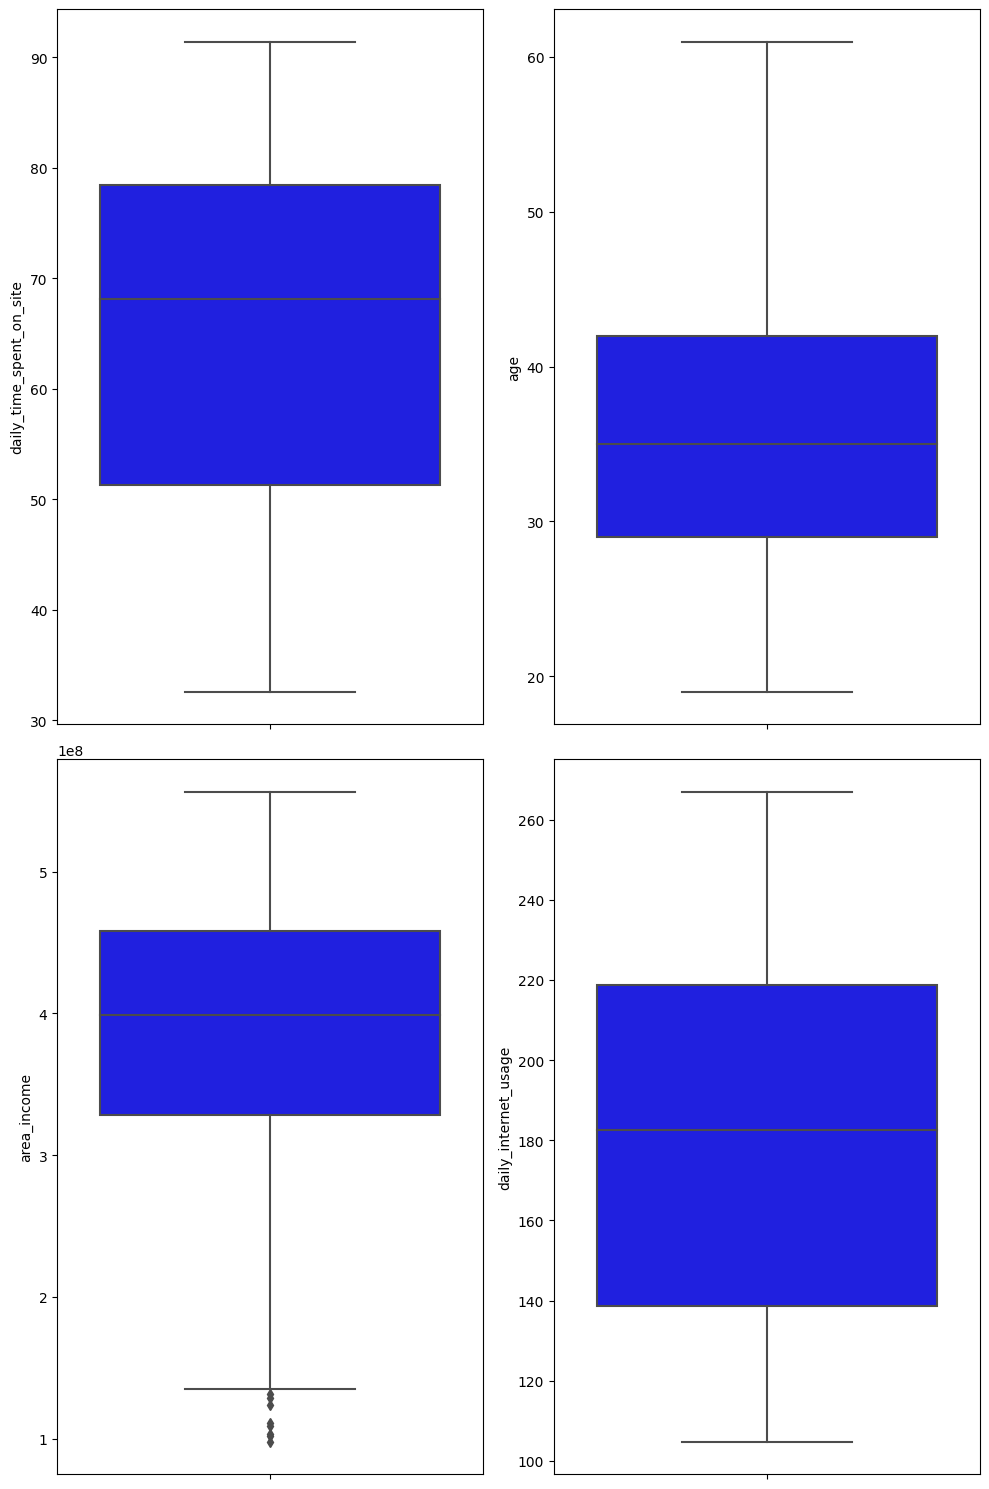

In [ ]:
# Individual BoxPlot 
plt.figure(figsize=(10,15)) #length (hor), heigh (ver)
for i in range(0, len(numerical)):
    plt.subplot(2, 2, i+1) #
    sns.boxplot(y=df[numerical[i]], color='blue', orient='v')
    plt.tight_layout()


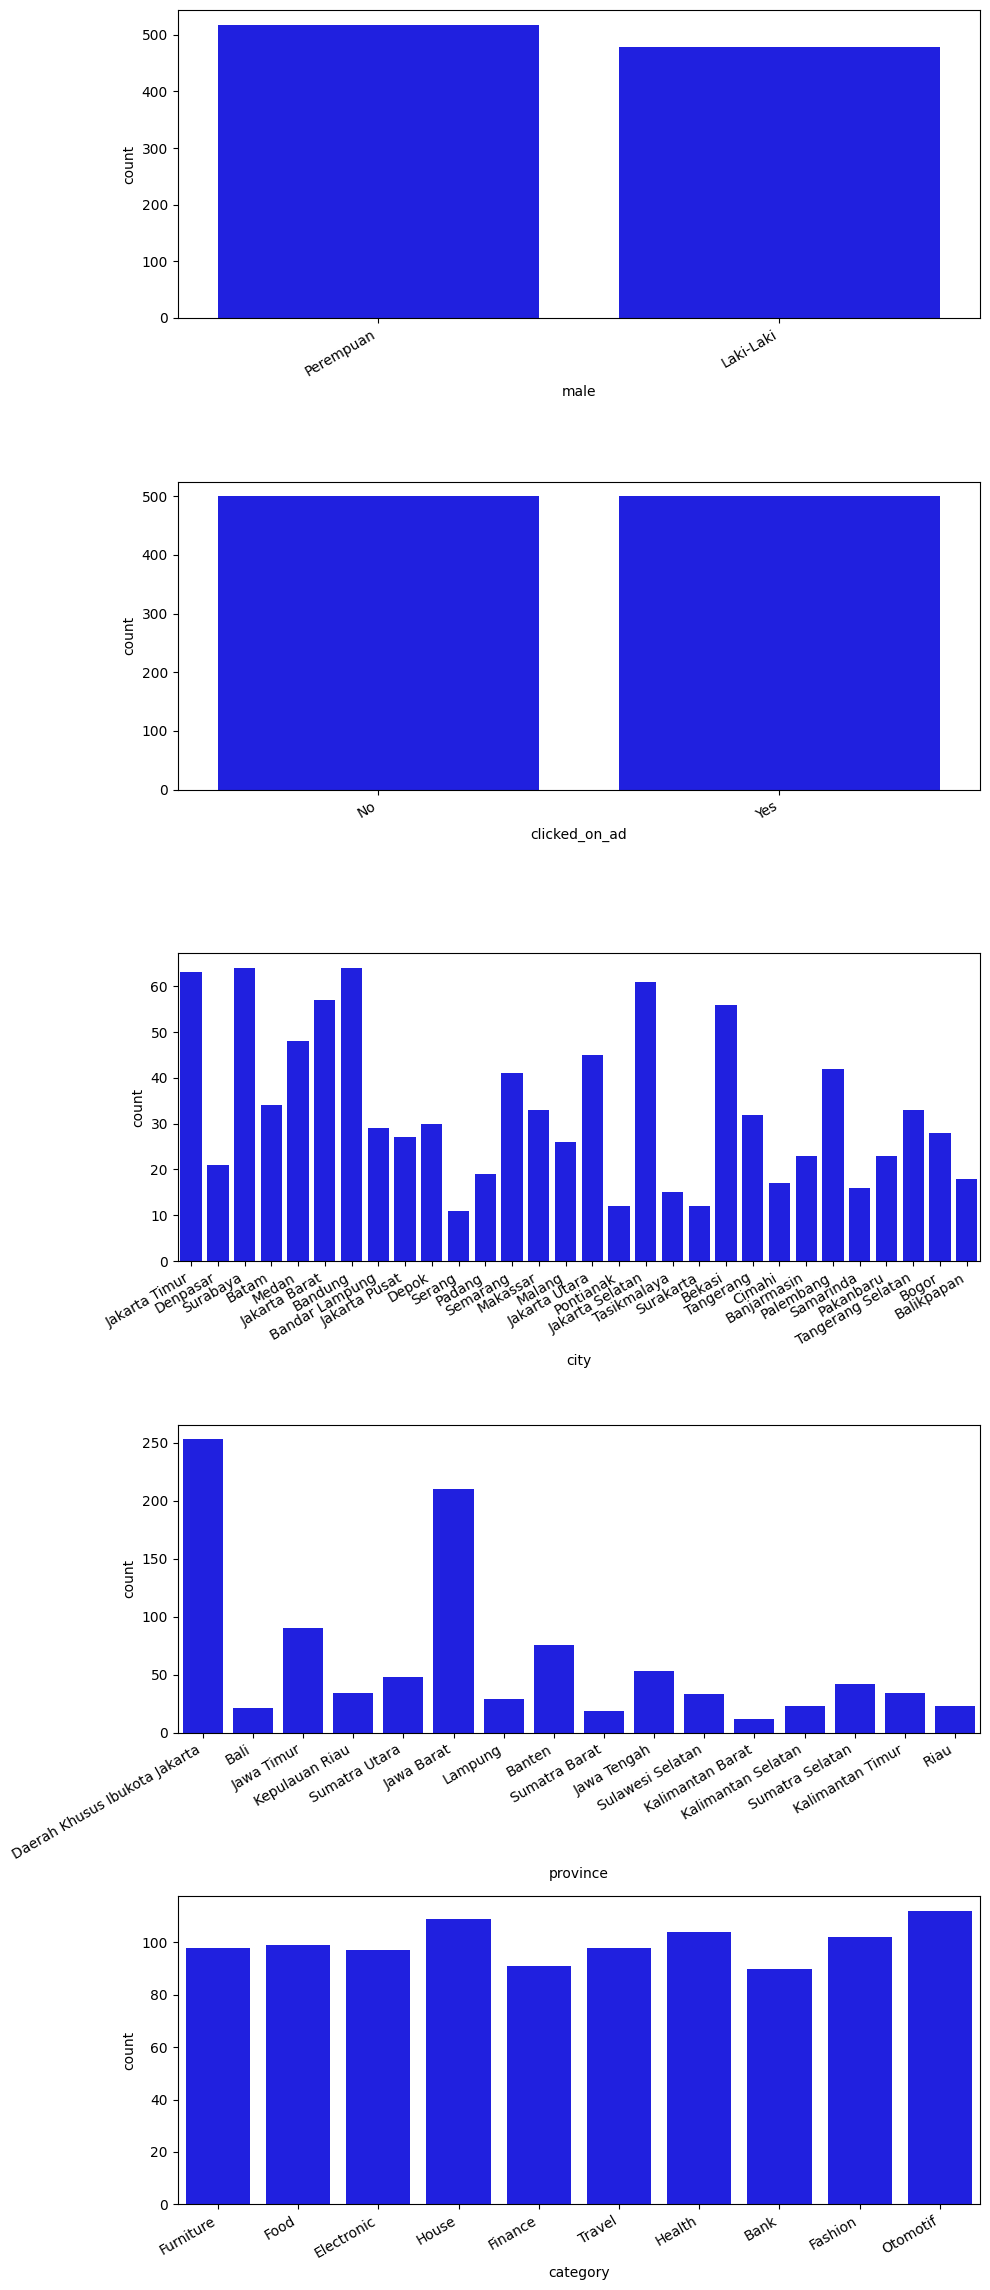

In [ ]:
plt.figure(figsize=(10, 23))
for i in range(0, len(categorical)): 
  plt.subplot(len(categorical), 1, i+1)
  plt.xticks(rotation=30, ha= 'right')
  sns.countplot( x = df[categorical[i]], color='blue')
  plt.tight_layout()

### Multivariate Analysis 

<Axes: >

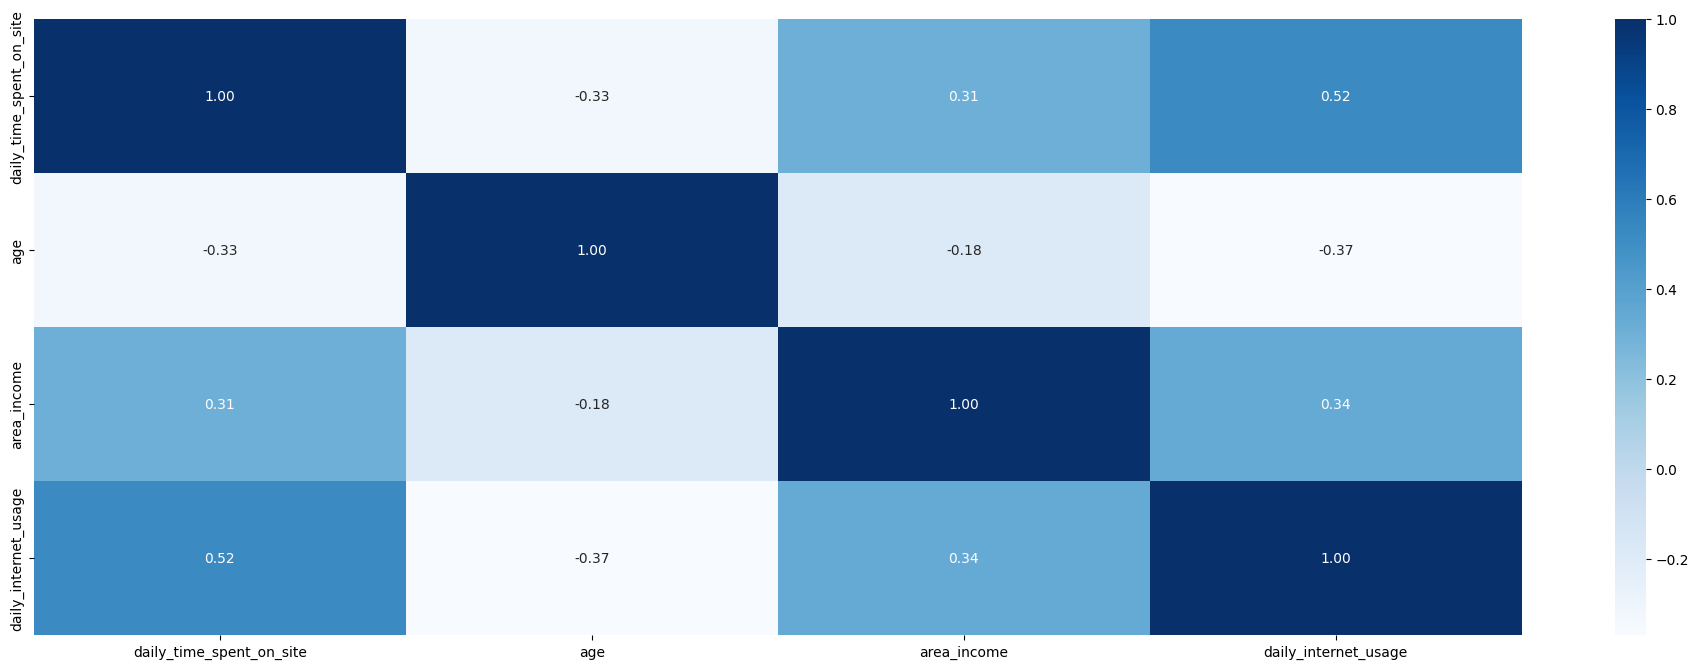

In [ ]:
df_new = df.copy()
plt.figure(figsize =(24,8))
sns.heatmap(df_new.corr(), cmap='Blues', annot= True, fmt ='.2f')

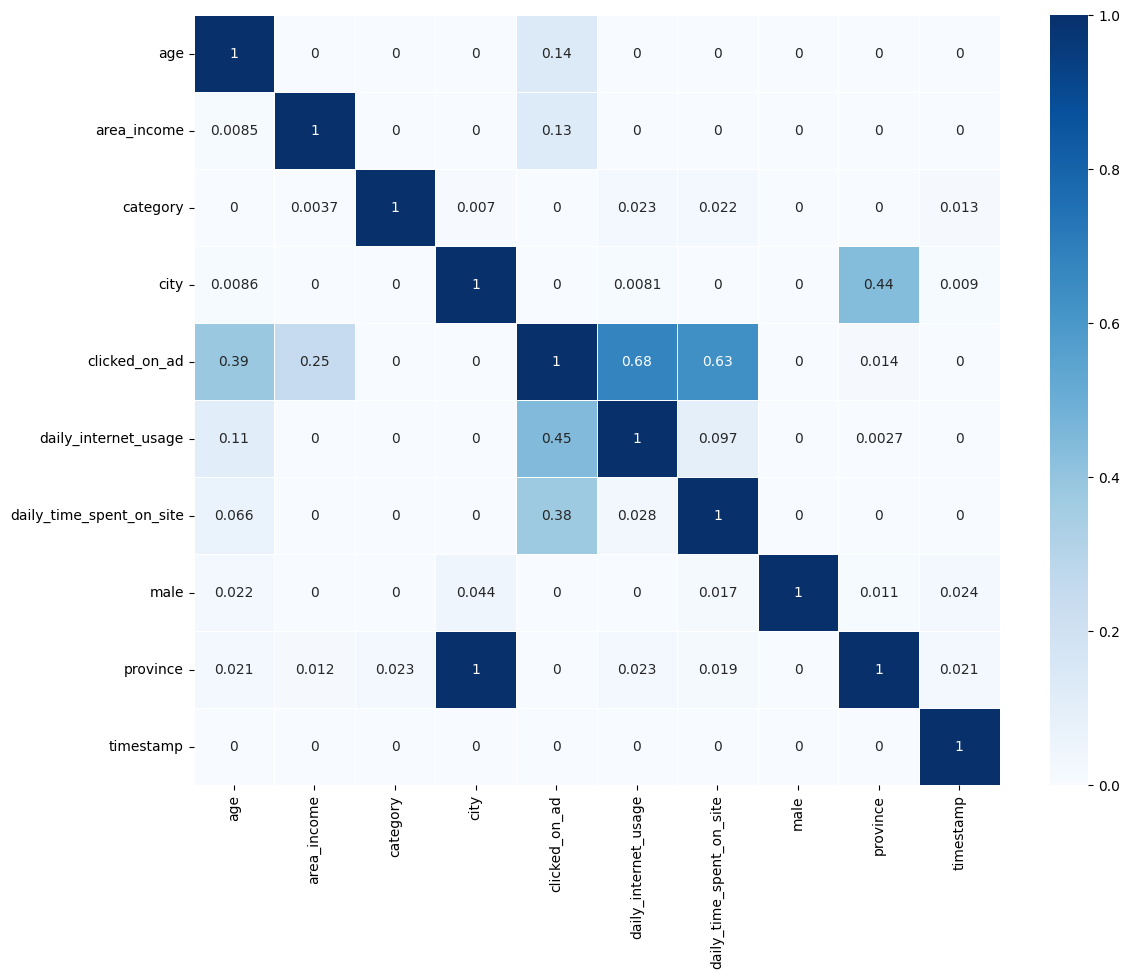

In [ ]:
df_pps = pps.matrix(df)
matrix_df = df_pps[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')

plt.figure(figsize=(13,10))
sns.heatmap(matrix_df, vmin = 0, vmax = 1, cmap='Blues', linewidth=0.5, annot=True)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

<Figure size 1800x800 with 0 Axes>

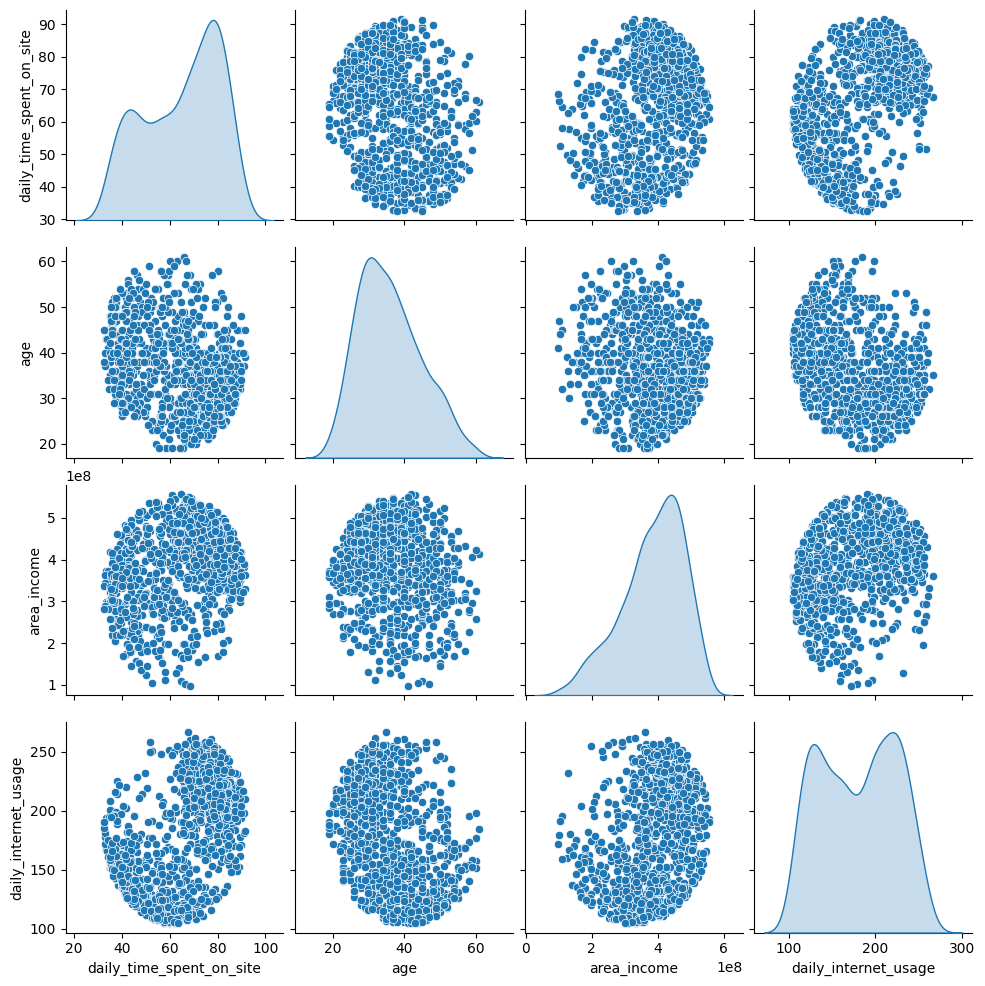

In [ ]:
plt.figure(figsize =(18,8))
sns.pairplot(df_new, diag_kind='kde')

Ditemukan bahwa pola yang paling menarik adalah korelasi feature terhadap target yaitu age, area_income, daily_time_spent_on_site dan daily_internet_usage. 

### Bivariate Analysis 

In [ ]:
df.columns

Index(['daily_time_spent_on_site', 'age', 'area_income',
       'daily_internet_usage', 'male', 'timestamp', 'clicked_on_ad', 'city',
       'province', 'category'],
      dtype='object')

In [ ]:
yes = df[df['clicked_on_ad'] == 'Yes']
no = df[df['clicked_on_ad'] == 'No']

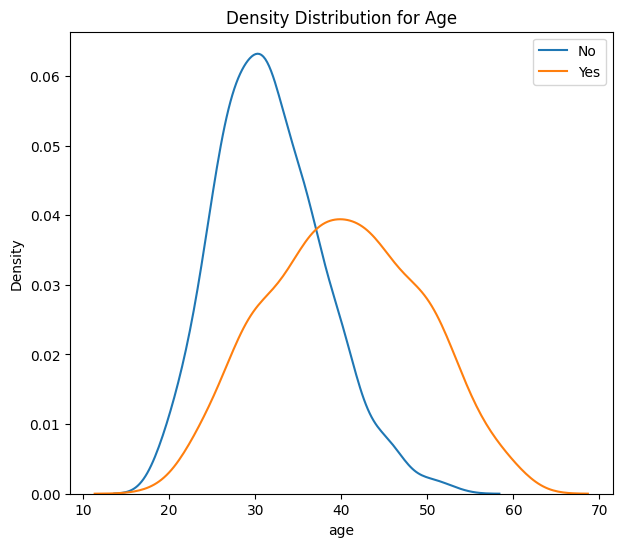

In [ ]:
plt.figure(figsize=(7,6))

sns.kdeplot(no['age'],label='No')
sns.kdeplot(yes['age'],label='Yes')

plt.title('Density Distribution for Age')
plt.legend()
plt.show()

Pelanggan yang biasanya merespon iklan perusahaan adalah mereka yang lebih dewasa dengan distribusi normal. Sedangkan user dengan rentang 20 - 40 cenderung akan menolak atau tidak klik iklan. 

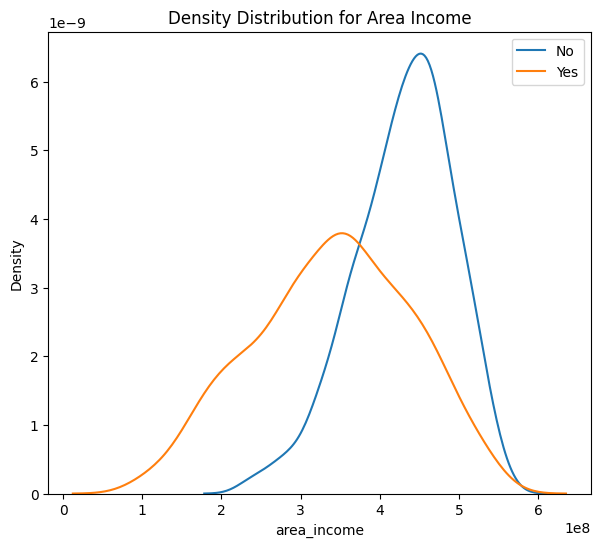

In [ ]:
plt.figure(figsize=(7,6))

sns.kdeplot(no['area_income'],label='No')
sns.kdeplot(yes['area_income'],label='Yes')

plt.title('Density Distribution for Area Income')
plt.legend()
plt.show()

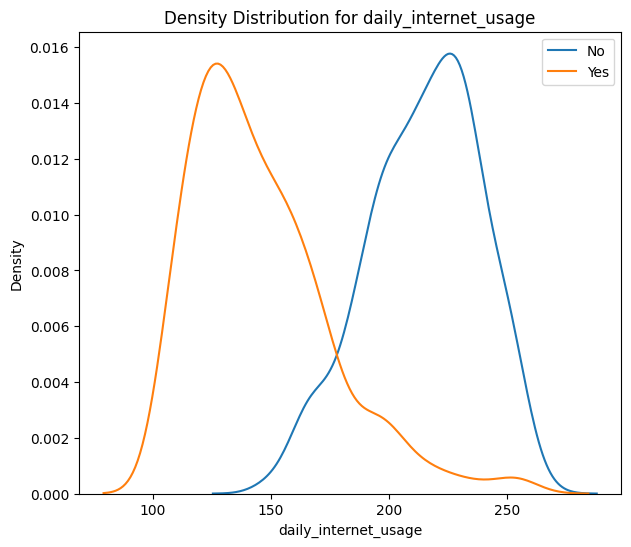

In [ ]:
plt.figure(figsize=(7,6))

sns.kdeplot(no['daily_internet_usage'],label='No')
sns.kdeplot(yes['daily_internet_usage'],label='Yes')

plt.title('Density Distribution for daily_internet_usage')
plt.legend()
plt.show()

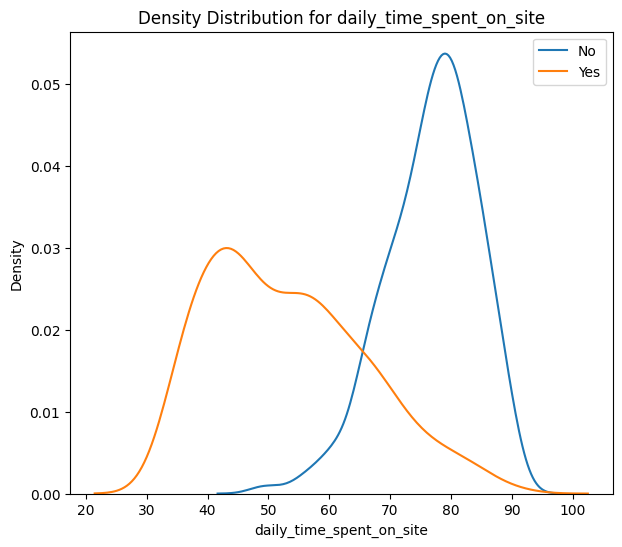

In [ ]:
plt.figure(figsize=(7,6))

sns.kdeplot(no['daily_time_spent_on_site'],label='No')
sns.kdeplot(yes['daily_time_spent_on_site'],label='Yes')

plt.title('Density Distribution for daily_time_spent_on_site')
plt.legend()
plt.show()

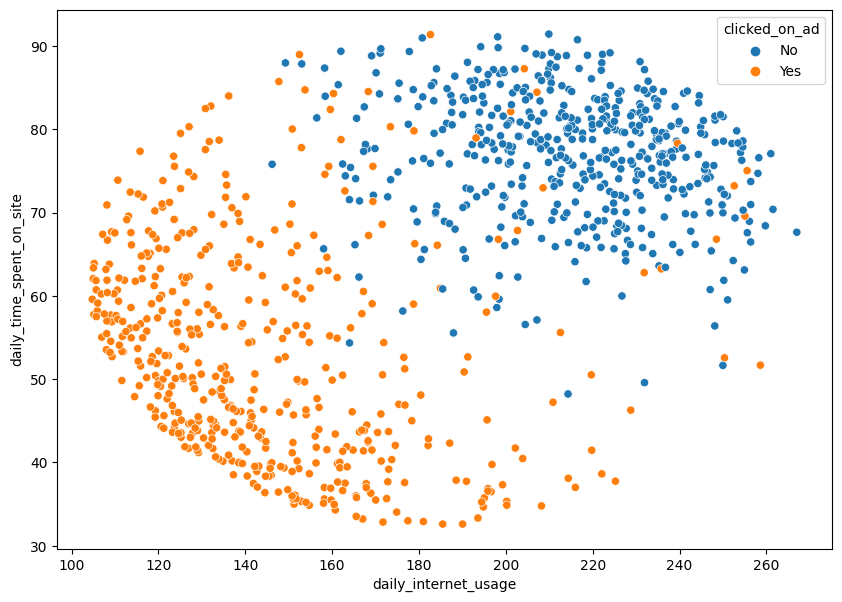

In [ ]:
plt.figure(figsize=(10,7))
sns.scatterplot(x=df['daily_internet_usage'],y=df['daily_time_spent_on_site'],hue=df['clicked_on_ad'])

plt.show()

Dari visualisasi diatas, kita dapat mengetahui bahwa terdapat pola yang terbentuk mengenai perilaku user dimana : 
1. User yang memiliki durasi waktu dan penggunaan internet yang besar cenderung tidak menyukai klik iklan dimana user ini kemudian disebut user active
2. User yang memiliki durasi waktu dan penggunaan internet yang cenderung rendah lebih menyukai klik iklan dibadingkan dengan user active, user ini kemudian disebut user non active

### Data Preprocessing 

#### Handle Missing Value and Duplicated Data 

In [ ]:
# Handle Missing Value - < 10 % delete

df.dropna(inplace = True)
df.drop_duplicates()

,daily_time_spent_on_site,age,area_income,daily_internet_usage,male,timestamp,clicked_on_ad,city,province,category
0,68.95,35,432837300.0,256.09,Perempuan,2016-03-27 00:53:00,No,Jakarta Timur,Daerah Khusus Ibukota Jakarta,Furniture
1,80.23,31,479092950.0,193.77,Laki-Laki,2016-04-04 01:39:00,No,Denpasar,Bali,Food
2,69.47,26,418501580.0,236.50,Perempuan,2016-03-13 20:35:00,No,Surabaya,Jawa Timur,Electronic
3,74.15,29,383643260.0,245.89,Laki-Laki,2016-01-10 02:31:00,No,Batam,Kepulauan Riau,House
4,68.37,35,517229930.0,225.58,Perempuan,2016-06-03 03:36:00,No,Medan,Sumatra Utara,Finance
5,59.99,23,418330920.0,226.74,Laki-Laki,2016-05-19 14:30:00,No,Jakarta Barat,Daerah Khusus Ibukota Jakarta,Travel
6,88.91,33,376969950.0,208.36,Perempuan,2016-01-28 20:59:00,No,Bandung,Jawa Barat,Electronic
7,66.00,48,172153310.0,131.76,Laki-Laki,2016-03-07 01:40:00,Yes,Bandar Lampung,Lampung,Health
8,74.53,30,482034000.0,221.51,Laki-Laki,2016-04-18 09:33:00,No,Batam,Kepulauan Riau,Bank
9,69.88,20,389496240.0,183.82,Laki-Laki,2016-07-11 01:42:00,No,Jakarta Pusat,Daerah Khusus Ibukota Jakarta,Health


#### Feature Encoding dan One Hot Encoding 

In [ ]:
# Feature Encoding 
male_map = {'Perempuan' : 1, 
            'Laki-Laki': 0}

male_target = {'Yes' : 1, 
            'No': 0} 

df['male'] = df['male'].map(male_map)
df['clicked_on_ad'] = df['clicked_on_ad'].map(male_target)

# Feature One Hot Encoding

prefix_province = pd.get_dummies(df['province'], prefix = 'is')
prefix_city = pd.get_dummies(df['city'], prefix = 'is')
prefix_category = pd.get_dummies(df['category'], prefix = 'is')

df = df.join(prefix_province)
df = df.join(prefix_city)
df = df.join(prefix_category)

In [ ]:
df.sample(3)

,daily_time_spent_on_site,age,area_income,daily_internet_usage,male,timestamp,clicked_on_ad,city,province,category,is_Bali,is_Banten,is_Daerah Khusus Ibukota Jakarta,is_Jawa Barat,is_Jawa Tengah,is_Jawa Timur,is_Kalimantan Barat,is_Kalimantan Selatan,is_Kalimantan Timur,is_Kepulauan Riau,is_Lampung,is_Riau,is_Sulawesi Selatan,is_Sumatra Barat,is_Sumatra Selatan,is_Sumatra Utara,is_Balikpapan,is_Bandar Lampung,is_Bandung,is_Banjarmasin,is_Batam,is_Bekasi,is_Bogor,is_Cimahi,is_Denpasar,is_Depok,is_Jakarta Barat,is_Jakarta Pusat,is_Jakarta Selatan,is_Jakarta Timur,is_Jakarta Utara,is_Makassar,is_Malang,is_Medan,is_Padang,is_Pakanbaru,is_Palembang,is_Pontianak,is_Samarinda,is_Semarang,is_Serang,is_Surabaya,is_Surakarta,is_Tangerang,is_Tangerang Selatan,is_Tasikmalaya,is_Bank,is_Electronic,is_Fashion,is_Finance,is_Food,is_Furniture,is_Health,is_House,is_Otomotif,is_Travel
541,75.65,39,448150850.0,247.90,0,2016-05-30 02:34:00,0,Semarang,Jawa Tengah,Furniture,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
678,87.85,34,362713890.0,153.01,1,2016-03-19 08:00:00,0,Medan,Sumatra Utara,Electronic,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
568,64.51,42,556393600.0,190.71,0,2016-04-29 07:49:00,0,Semarang,Jawa Tengah,Travel,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
df.columns

Index(['daily_time_spent_on_site', 'age', 'area_income',
       'daily_internet_usage', 'male', 'timestamp', 'clicked_on_ad', 'city',
       'province', 'category', 'is_Bali', 'is_Banten',
       'is_Daerah Khusus Ibukota Jakarta', 'is_Jawa Barat', 'is_Jawa Tengah',
       'is_Jawa Timur', 'is_Kalimantan Barat', 'is_Kalimantan Selatan',
       'is_Kalimantan Timur', 'is_Kepulauan Riau', 'is_Lampung', 'is_Riau',
       'is_Sulawesi Selatan', 'is_Sumatra Barat', 'is_Sumatra Selatan',
       'is_Sumatra Utara', 'is_Balikpapan', 'is_Bandar Lampung', 'is_Bandung',
       'is_Banjarmasin', 'is_Batam', 'is_Bekasi', 'is_Bogor', 'is_Cimahi',
       'is_Denpasar', 'is_Depok', 'is_Jakarta Barat', 'is_Jakarta Pusat',
       'is_Jakarta Selatan', 'is_Jakarta Timur', 'is_Jakarta Utara',
       'is_Makassar', 'is_Malang', 'is_Medan', 'is_Padang', 'is_Pakanbaru',
       'is_Palembang', 'is_Pontianak', 'is_Samarinda', 'is_Semarang',
       'is_Serang', 'is_Surabaya', 'is_Surakarta', 'is_Tangerang',
   

In [ ]:
df.drop(['timestamp'], axis =1, inplace = True )

## Modelling 

In [ ]:
X = df.drop(labels=['clicked_on_ad'], axis = 1)
y = df[['clicked_on_ad']]

In [ ]:
X_dummy = pd.get_dummies(X)

In [ ]:
from sklearn.model_selection import train_test_split 

# Separate X (feature) and Y (target) [[70, 30]]
X_train, X_test, y_train, y_test = train_test_split(X_dummy, y, test_size = 0.3, stratify = y, random_state = 123)


In [ ]:
print('X_train : ', X_train.shape)
print('X_test : ', X_test.shape)
print('(Rows, Feature)')

X_train :  (674, 117)
X_test :  (289, 117)
(Rows, Feature)


In [ ]:
# IMPORT LIBRARY FOR MODELLING

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from collections import defaultdict

from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
def experiment(X_train,X_test,y_train,y_test):
    """
    This function want to do an experiment for several models.
    We just need data input

    Parameter
    ---------
    X_train = training data contains several features
    X_test = testing data contains several features
    y_train = train target
    y_test = test target
    """
    result = defaultdict(list)
    
    knn = KNeighborsClassifier()
    logreg = LogisticRegression()
    dtc = DecisionTreeClassifier()
    rf = RandomForestClassifier()
    grad = GradientBoostingClassifier()
    
    list_model = [('K-Nearest Neighbor',knn),
                  ('Logistic Regression',logreg),
                  ('Decision Tree',dtc),
                  ('Random Forest',rf),
                  ('Gradient Boosting',grad)
                 ]
    
    for model_name,model in list_model:
        start = dt.now()
        model.fit(X_train,y_train)
        duration = (dt.now()-start).total_seconds()
        
        y_pred = model.predict(X_test)
        
        accuracy = accuracy_score(y_test,y_pred)
        recall = recall_score(y_test,y_pred)
        precision = precision_score(y_test,y_pred)
        
        result['model_name'].append(model_name)
        result['model'].append(model)
        result['accuracy'].append(accuracy)
        result['recall'].append(recall)
        result['precision'].append(precision)
        result['duration'].append(duration)
        
    return result

In [ ]:
result = experiment(X_train, X_test, y_train, y_test)
result = pd.DataFrame(result)
result

,model_name,model,accuracy,recall,precision,duration
0,K-Nearest Neighbor,KNeighborsClassifier(),0.671280,0.630137,0.691729,0.009359
1,Logistic Regression,LogisticRegression(),0.494810,0.000000,0.000000,0.024757
2,Decision Tree,DecisionTreeClassifier(),0.930796,0.952055,0.914474,0.020319
3,Random Forest,"(DecisionTreeClassifier(max_features='sqrt', r...",0.948097,0.945205,0.951724,0.549195
4,Gradient Boosting,([DecisionTreeRegressor(criterion='friedman_ms...,0.944637,0.958904,0.933333,0.793807


In [ ]:
from sklearn.preprocessing import MinMaxScaler 
minmax_scaler = MinMaxScaler() 

X_train_minmax = minmax_scaler.fit_transform(X_train)
X_test_minmax = minmax_scaler.fit_transform(X_test)

In [ ]:
result1 = experiment(X_train_minmax, X_test_minmax, y_train, y_test)
result1 = pd.DataFrame(result1)
result1

,model_name,model,accuracy,recall,precision,duration
0,K-Nearest Neighbor,KNeighborsClassifier(),0.750865,0.732877,0.764286,0.008675
1,Logistic Regression,LogisticRegression(),0.948097,0.924658,0.971223,0.023625
2,Decision Tree,DecisionTreeClassifier(),0.910035,0.924658,0.900000,0.007551
3,Random Forest,"(DecisionTreeClassifier(max_features='sqrt', r...",0.951557,0.952055,0.952055,0.582976
4,Gradient Boosting,([DecisionTreeRegressor(criterion='friedman_ms...,0.937716,0.952055,0.926667,0.942897


#### Business Metric 

Pada modelling ini dipertimbangkan bahwa business metric yang digunakan adalah (1) Recall, dengan maksud untuk mengurangi False Negative, karena untuk setiap kesalahan model memprediksi Benar pelanggan akan meresponse padahal pelanggan tidak akan meresponse terdapat cost yang perlu perusahaan keluarkan untuk iklan tersebut dan (2) Precision, dengan maksud mengurangi False Positive, yaitu keadaan dimana model memprediksi pelanggan Tidak akan meresponse iklan padahal pelanggan akan meresponse terdapat opportunity revenue perusahaan yang hilang.

Kesimpulan pada Experiment 0 yaitu pemodelan dengan hanya menggunakan data default mendapatkan bahwa model Decision tree dan Gradient Boosting adalah model yang terbaik. 

Sedangkan pada experiment 1 yaitu pemodelan dilakukan dengan data yang lebih dulu dilakukan scalling dengan teknik MinMaxScaler. Process feature scalling mampu meningkatkan performa model pada logistic regression. Namun, pada experiment ini diperoleh hasil model yang terbaik adalah Random Forest dan Gradient Boosting. 

Sehingga Model yang dipilih adalah Random Forest dari Experiment 1. 

## Evaluation 

In [ ]:
final_model = result1['model'][3]
y_pred = final_model.predict(X_test_minmax)


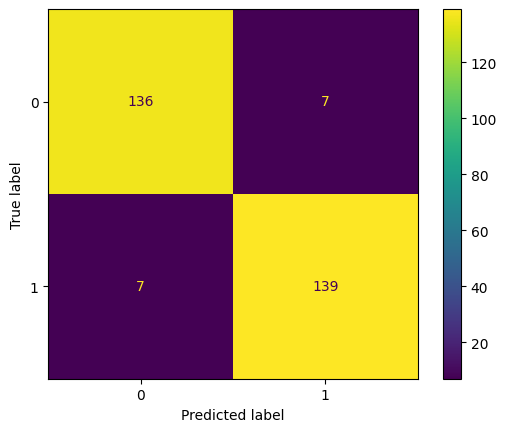

In [ ]:
# Fit data with confusion matrix 
cfsn_mt = confusion_matrix(y_test, y_pred)

#Display confusion matrix 
disp = ConfusionMatrixDisplay(confusion_matrix=cfsn_mt , display_labels=final_model.classes_)
disp.plot()
plt.title
plt.show()

## Recommendation Business 

### Feature Importance 

In [ ]:
feature_imp = {}

feature_imp['columns'] = X_train.columns
feature_imp['feature_imp'] = result1['model'][3].feature_importances_

df_feat_imp = pd.DataFrame(feature_imp)
df_feat_imp = df_feat_imp.sort_values(['feature_imp'], ascending = False).head(10)

<Axes: title={'center': 'Feature Importance of Random Forest Modelling'}, xlabel='feature_imp', ylabel='columns'>

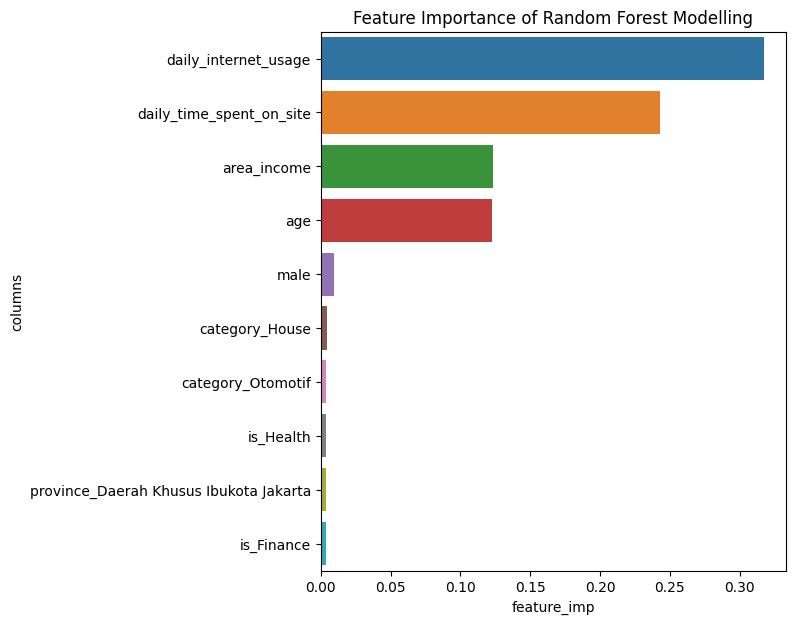

In [ ]:
plt.figure(figsize=(6, 7))
plt.title("Feature Importance of Random Forest Modelling")
sns.barplot(x=df_feat_imp['feature_imp'], y=df_feat_imp['columns'])

#### Shap Values 

In [ ]:
!pip install shap 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.4/572.4 KB 10.9 MB/s eta 0:00:00


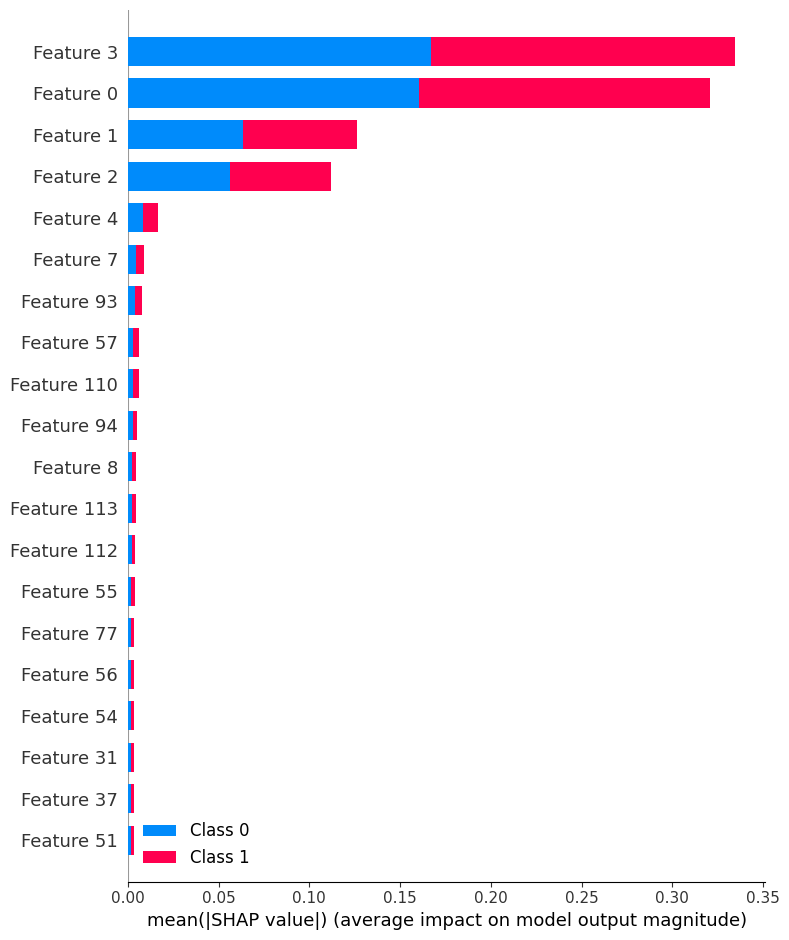

In [ ]:
import shap 
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train_minmax, y_train)

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train_minmax) 
shap.summary_plot(shap_values, X_train_minmax)


#### Rekomendasi 

Hasil feature importance sejalan dengan insight awal yang diberikan adalah sebagai berikut 

1. daily_internet_usage
2. daily_time_spent_on_site
3. area_income
4. age  

Dimana terdapat dua segment pelanggan dengan kriteria sebagai berikut 

1. Pelanggan dengan kriteria umur yang lebih muda, income tinggi, penggunaan daily internet dan time spent yang dihabiskan dalam website cenderung tinggi. Segment kelompok ini diasumsikan lebih melek digital sehingga tidak mudah tergiur iklan Ads. Sehingga rekomendasi bisnis yang dapat dilakukan oleh perusahaan adalah menggunakan strategi konten yang lebih soft sehingga tidak terlalu mencolok. 

2. Pelanggan dengan kriteria umur yang lebih tua, income yang lebih rendah, penggunaan daily internet dan time spent yang dihabiskan dalam website cenderung rendah. Segment kelompok ini adalah target paling potential untuk diberikan iklan karena kecenderungan untuk meresponse. Iklan yang diberikan kepada segment kelompok ini bisa disederhanakan dengan topik yang mudah dipahami oleh kalangan usia tersebut. 